<a href="https://colab.research.google.com/github/pltnhan/machinelearningplatforms/blob/main/LogisticRegressionClassification_Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification

## Logistic Regression

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import collections  as mc
%load_ext autoreload
%autoreload 2
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
sns.set_style("white")

### Important!

__For all the questions below, fix the seed of random generators to 72.__

In [ ]:
np.random.seed = 72

### Load data

Tele-costumer-churn data-set. (you can download it from [here](https://www.kaggle.com/blastchar/telco-customer-churn))

Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

The data set includes information about:

> 1. Customers who left within the last month – the column is called Churn
> 2. Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
> 3. Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
> 4. Demographic info about customers – gender, age range, and if they have partners and dependents

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os
import sys
os.chdir('/content/gdrive/MyDrive/IU Material/Machine Learning Platforms/Lab2')
sys.path.append("/content/gdrive/MyDrive/IU Material/Machine Learning Platforms/Lab2")
!pwd

/content/gdrive/MyDrive/IU Material/Machine Learning Platforms/Lab2


In [ ]:
# find the link to the raw data from github
df = pd.read_csv("telco_customer_churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.shape

(7043, 21)

In [ ]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

For some of the data points there is no `TotalCharges` value. We need to find these data points and remove them.

In [ ]:
z = df["TotalCharges"].map(lambda x: x.replace('.', '', 1).isdigit())
df = df[z]

In [ ]:
df.reset_index(inplace=True)
df.shape

(7032, 22)

In [ ]:
df["TotalCharges"] = df["TotalCharges"].astype(float)

### base rate
What is the base rate?

In [ ]:
# base rate
churn_count = df['Churn'].value_counts()
churn_rate = churn_count['Yes'] / df.shape[0]

print("Churn rate (base rate):", churn_rate)

Churn rate (base rate): 0.26578498293515357


In [ ]:
df.isna().sum()

index               0
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### Training

Train a logistic regression on this data-set. Use these set of features: "tenure", "MonthlyCharges", "TotalCharges", "gender", "PhoneService", "TechSupport", "StreamingTV", "PaperlessBilling"

- what is the train accuracy?

- what is the test accuracy?

- How does adding the categorical features improve the accuracy?

- what is the precision and recall for the customers who churn? (churn = yes)


__Hint__: Let's use label encoding and/or one-hot encoding for categorical features.

In [ ]:
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn import datasets

In [ ]:
# add the one-hot/label encoding
features = ["tenure", "MonthlyCharges", "TotalCharges", "gender", "PhoneService", "TechSupport", "StreamingTV", "PaperlessBilling", "Churn"]
df1 = df[features]

In [ ]:
df1.head()

,tenure,MonthlyCharges,TotalCharges,gender,PhoneService,TechSupport,StreamingTV,PaperlessBilling,Churn
0,1,29.85,29.85,Female,No,No,No,Yes,No
1,34,56.95,1889.50,Male,Yes,No,No,No,No
2,2,53.85,108.15,Male,Yes,No,No,Yes,Yes
3,45,42.30,1840.75,Male,No,Yes,No,No,No
4,2,70.70,151.65,Female,Yes,No,No,Yes,Yes


In [ ]:
def class_convert(churn):
    if churn=='Yes':
        return 1
    else:
        return 0

In [ ]:
df1['Churn']=df1['Churn'].apply(class_convert)

<ipython-input-32-ec87c4c98140>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Churn']=df1['Churn'].apply(class_convert)


In [ ]:
df_dummies = pd.get_dummies(data=df1)
df_dummies.head()

,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,PhoneService_No,PhoneService_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,PaperlessBilling_No,PaperlessBilling_Yes
0,1,29.85,29.85,0,1,0,1,0,1,0,0,1,0,0,0,1
1,34,56.95,1889.50,0,0,1,0,1,1,0,0,1,0,0,1,0
2,2,53.85,108.15,1,0,1,0,1,1,0,0,1,0,0,0,1
3,45,42.30,1840.75,0,0,1,1,0,0,0,1,1,0,0,1,0
4,2,70.70,151.65,1,1,0,0,1,1,0,0,1,0,0,0,1


In [ ]:
# split train/test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_dummies.drop('Churn',axis=1),
                                                    df_dummies['Churn'], test_size=0.2, random_state=72)

In [ ]:
# we standardize only the numerical features
standardize = StandardScaler()
standardize.fit(X_train)

StandardScaler()

In [ ]:
# standardize.transform(...)
X_scaled = standardize.transform(X_train)

In [ ]:
# Logistic regression with cross-validation
'''
parameters:
solver='lbfgs', cv=5, max_iter=1000
'''
clf = LogisticRegressionCV(solver='lbfgs', cv=5, max_iter=1000, random_state=0)

In [ ]:
clf.fit(X_train, y_train)

LogisticRegressionCV(cv=5, max_iter=1000, random_state=0)

In [ ]:
# train accuracy
clf.score(X_train,y_train)

0.8007111111111112

In [ ]:
# test accuracy
clf.score(X_test,y_test)

0.7867803837953091

### Confusion matrix

In [ ]:
# confusion matrix
from sklearn.metrics import confusion_matrix
pd.DataFrame(confusion_matrix(y_test, clf.predict(X_test)),columns=['Predict-YES','Predict-NO'],index=['YES','NO'])

,Predict-YES,Predict-NO
YES,945,98
NO,202,162


### precision-recall

- what are the precision and recall for calss label 1 ?


In [ ]:
from sklearn.metrics import precision_score, recall_score, precision_recall_curve

# precision
print("Precision:", precision_score(y_test, clf.predict(X_test)))
# recall
print("Recall:", recall_score(y_test, clf.predict(X_test)))

Precision: 0.6230769230769231
Recall: 0.44505494505494503


### bonus! precision-recall curve

Read about `precision_recall_curve` from sklearn and plot the precision-recall curve for the classification you just did. (look at [this](https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html) example)

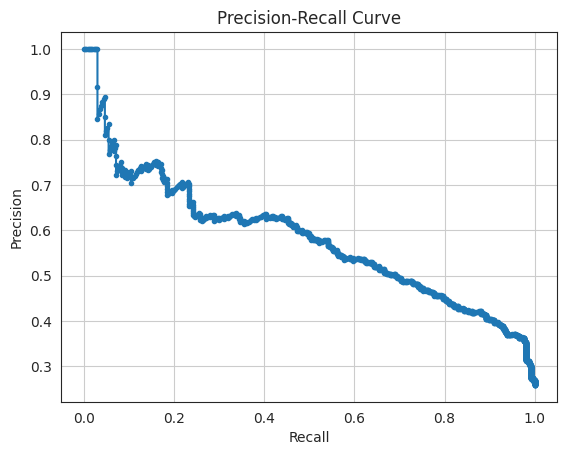

In [ ]:
precision, recall, thresholds = precision_recall_curve(y_test, clf.predict_proba(X_test)[:, 1])

# Plot precision-recall curve
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.show()

### Hand-written digits data set

Let's play with a famous data-set in Machine Learning. We want to predict the digits from their hand-written images. These data-set contains $8 \times 8$ images of hand-written digits.

In [ ]:
# The digits dataset: we can load it directly from sklearn
digits = datasets.load_digits()


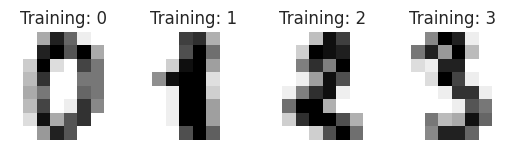

In [ ]:
# The data that we are interested in is made of 8x8 images of digits, let's
# have a look at the first 4 images, stored in the `images` attribute of the
# dataset.  If we were working from image files, we could load them using
# matplotlib.pyplot.imread.  Note that each image must have the same size. For these
# images, we know which digit they represent: it is given in the 'target' of
# the dataset.
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:4]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)


In [ ]:
digits.images.shape

(1797, 8, 8)

Looking at the images data, we can see that it is a 3-dimensional matrix. Therefore to apply a classifier on this data, we need to flatten the image, to turn the data into a (samples, feature) matrix. You can do it by using `np.reshape` from numpy package.

In [ ]:
# reshaping
data = digits.images.reshape((len(digits.images), -1))

In [ ]:
# train/test split
data_train, data_test, target_train, target_test = train_test_split(data, digits.target, test_size=0.2, random_state=72)

### Multi-class logistic regression

- Train a multi class logistic regression on this data-set

- what is the train accuracy?

- what is the test accuracy?

- what is the precision and recall for each class label?

- show the confusion matrix

In [ ]:
# Logistic regression with cross-validation
'''
parameters:
solver='saga', cv=3, max_iter=2000, tol=0.001, multi_class="multinomial"
'''
clf1 = LogisticRegressionCV(solver='saga', cv=3, max_iter=2000, tol=0.001, multi_class="multinomial")

In [ ]:
clf1.fit(data_train, target_train)

LogisticRegressionCV(cv=3, max_iter=2000, multi_class='multinomial',
                     solver='saga', tol=0.001)

In [ ]:
# train accuracy
clf1.score(data_train, target_train)

0.988169798190675

In [ ]:
# test accuracy
clf1.score(data_test, target_test)

0.9722222222222222

_Classification report_ gives you the precision and recall for each target class. (more about classification report [here](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html))

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(target_test, clf1.predict(data_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       0.94      0.97      0.95        32
           2       1.00      1.00      1.00        41
           3       1.00      0.97      0.98        30
           4       0.97      0.97      0.97        32
           5       0.97      0.89      0.93        36
           6       0.97      1.00      0.99        39
           7       1.00      1.00      1.00        31
           8       0.97      0.95      0.96        38
           9       0.91      0.98      0.94        41

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



And finally the confusion matrix. Take a look at [this](https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py) example and try to visualize the confusion matrix.

In [ ]:
# confusion matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import confusion_matrix

print(confusion_matrix(target_test, clf1.predict(data_test)))


[[40  0  0  0  0  0  0  0  0  0]
 [ 0 31  0  0  0  0  0  0  1  0]
 [ 0  0 41  0  0  0  0  0  0  0]
 [ 0  0  0 29  0  1  0  0  0  0]
 [ 0  0  0  0 31  0  0  0  0  1]
 [ 0  0  0  0  0 32  1  0  0  3]
 [ 0  0  0  0  0  0 39  0  0  0]
 [ 0  0  0  0  0  0  0 31  0  0]
 [ 0  2  0  0  0  0  0  0 36  0]
 [ 0  0  0  0  1  0  0  0  0 40]]


#### bonus! check if the predictions are correct for some examples of the images in the test set

Use `plt.imshow` to visualize an image with matplotlib.

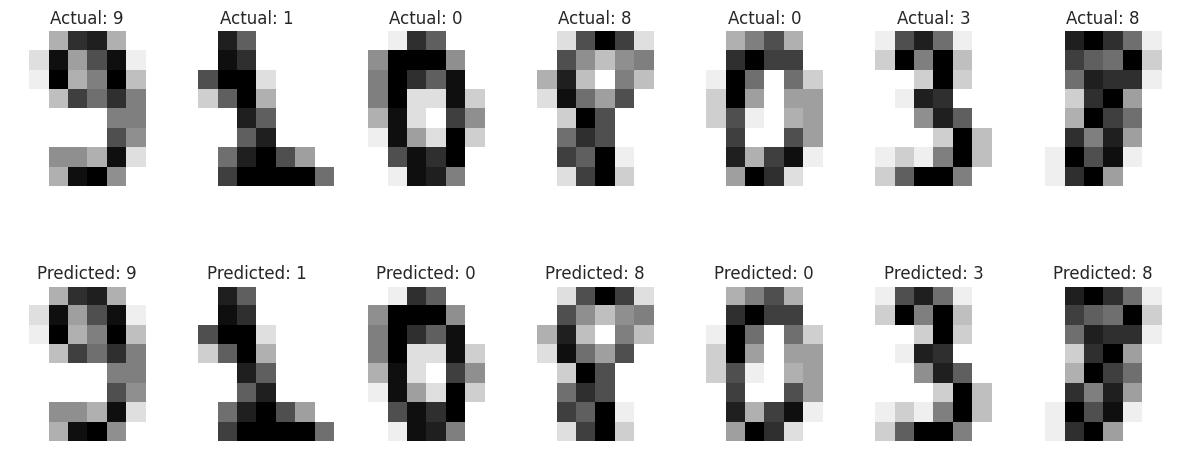

In [ ]:
num_images =7
predictions = clf1.predict(data_test)

indices = np.random.choice(len(data_test), num_images, replace=False)

# Plot the original images alongside their predicted labels
plt.figure(figsize=(12, 6))
for i, idx in enumerate(indices):
    # Original image
    plt.subplot(2, num_images, i + 1)
    plt.imshow(data_test[idx].reshape(8, 8), cmap=plt.cm.gray_r)
    plt.axis('off')
    plt.title(f'Actual: {target_test[idx]}')

    # Predicted label
    plt.subplot(2, num_images, num_images + i + 1)
    plt.imshow(data_test[idx].reshape(8, 8), cmap=plt.cm.gray_r)
    plt.axis('off')
    plt.title(f'Predicted: {predictions[idx]}')

plt.tight_layout()
plt.show()